### Strategy Backtesting Using Python (DMP-1)
#### Notebook Created on:  15 May 2020
##### _Last Update: 10 Mar 2023_
##### Author: Vivek Krishnamoorthy (with inputs from Mario Pisa Pena, Jay Parmar and Ashutosh Dave)

### Today's Agenda


- Step-wise approach to creating and testing trading strategies (slides)
- Strategy 1A: Simple moving averages (on 5 minute data)
- Strategy 1B: Exponential moving averages (on 5 minute data)
- Strategy 2: Big moves on Mondays
- Strategy 3: Moving average crossover (The “Hello World” of quant trading approaches)
- Strategy 4: MACD (if time permits)
- A glimpse at `PyFolio`

### Warming up - Basic applications of Moving Averages

#### Strategy # 1A: Simple Moving Average *(Long only)*

<div class="alert alert-info"><strong>Step I: Coming up with a trading idea (Using 5-minute data)</strong>

<br>We determine the 12-period simple moving average (referred to as 'SMA12') and compare it with the price at that time. We (subjectively) select 12 since SMA12 would be the average price over one hour.

There are two conditions which we check.

1. If the price is greater than the SMA12, we go long. We continue to stay invested until the square-off condition is satisfied.

2. When the price becomes less than the SMA12, we square off our long position.

Our trading rules can be stated as

* Buy when price > SMA12
* Square off when price < SMA12
</div>

In [ ]:
#################################################################
################### Class Exercise 1 ############################
############## Step II (downloading the data) ###################
############## Step VII (contingency plan) ######################
#################################################################

# Import the required libraries with the usual shorthand notations where possible
# Create a variable called end1 for today. Use the datetime library.
# Create a variable start1 which is 50 days before end1
# Use the yfinance library to download the data into a variable df for "Nifty" OHLCV data 
# between start1 and end1.
# The data has to be at 5 minute intervals.
# The download should be into a pandas DataFrame called df
# Check the data type, the dimensions, the first few and last few rows of the pandas DataFrame



# For backtesting the strategy, please use the attached csv file and import into pandas
# Call the pandas DataFrame df
# Check the data type, the dimensions, the first few and last few rows of df
# Create a copy of df called df1a. (We will manipulate and work with the df1a DataFrame.)

```python

import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


# To use interactive plotting we can also use cufflinks

import cufflinks as cf

# To enable offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline


end1 = datetime.date.today()
start1 = end1 - pd.Timedelta(days=50)

df = yf.download("^NSEI", start=start1, end=end1, interval="5m" )
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

# Run the below lines to load the data used in backtesting the strategy 


df = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True)
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

df1a = df.copy()

```

In [100]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [101]:
datetime.date.today()

datetime.date(2023, 6, 4)

In [102]:
end1 = datetime.date.today()
end1

datetime.date(2023, 6, 4)

In [103]:
end1 + pd.Timedelta(days=2)

datetime.date(2023, 6, 6)

In [104]:
start1 = end1 - pd.Timedelta(days=50)

In [3]:
end1

datetime.date(2023, 6, 4)

In [105]:
start1

datetime.date(2023, 4, 15)

In [ ]:
yf.download()

In [106]:
df = yf.download("^NSEI", start=start1, end=end1, interval="5m" )

[*********************100%***********************]  1 of 1 completed


In [108]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-17 09:15:00+05:30,17863.000000,17863.000000,17671.500000,17673.650391,17673.650391,0
2023-04-17 09:20:00+05:30,17673.150391,17688.949219,17658.599609,17662.599609,17662.599609,0
2023-04-17 09:25:00+05:30,17664.099609,17667.699219,17633.900391,17634.449219,17634.449219,0
2023-04-17 09:30:00+05:30,17633.650391,17643.550781,17620.699219,17640.150391,17640.150391,0
2023-04-17 09:35:00+05:30,17640.800781,17646.050781,17626.500000,17641.050781,17641.050781,0
2023-04-17 09:40:00+05:30,17641.300781,17644.800781,17632.250000,17636.599609,17636.599609,0
2023-04-17 09:45:00+05:30,17635.699219,17651.949219,17628.449219,17630.150391,17630.150391,0
2023-04-17 09:50:00+05:30,17630.849609,17630.849609,17604.400391,17604.500000,17604.500000,0
2023-04-17 09:55:00+05:30,17605.250000,17608.250000,17581.800781,17583.250000,17583.250000,0


In [ ]:
!pip install yfinance

In [119]:
# Reading data from a csv file
df = pd.read_csv("NSE_5min_interval.csv")
df

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2020-03-26 09:15:00+05:30,8451.000000,8457.650391,8338.400391,8339.349609,8339.349609,0
1,2020-03-26 09:20:00+05:30,8336.400391,8411.799805,8309.950195,8396.650391,8396.650391,0
2,2020-03-26 09:25:00+05:30,8396.849609,8476.950195,8372.099609,8476.599609,8476.599609,0
3,2020-03-26 09:30:00+05:30,8476.900391,8518.450195,8460.000000,8488.400391,8488.400391,0
4,2020-03-26 09:35:00+05:30,8490.099609,8515.000000,8482.349609,8487.500000,8487.500000,0
...,...,...,...,...,...,...,...
2237,2020-05-14 15:05:00+05:30,9152.250000,9152.500000,9146.500000,9149.400391,9149.400391,0
2238,2020-05-14 15:10:00+05:30,9149.049805,9152.750000,9134.200195,9137.299805,9137.299805,0
2239,2020-05-14 15:15:00+05:30,9136.799805,9140.450195,9132.000000,9139.950195,9139.950195,0
2240,2020-05-14 15:20:00+05:30,9139.400391,9151.349609,9130.250000,9145.500000,9145.500000,0


In [120]:
# Reading data from a csv file
df = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8457.650391,8338.400391,8339.349609,8339.349609,0
2020-03-26 09:20:00+05:30,8336.400391,8411.799805,8309.950195,8396.650391,8396.650391,0
2020-03-26 09:25:00+05:30,8396.849609,8476.950195,8372.099609,8476.599609,8476.599609,0
2020-03-26 09:30:00+05:30,8476.900391,8518.450195,8460.000000,8488.400391,8488.400391,0
2020-03-26 09:35:00+05:30,8490.099609,8515.000000,8482.349609,8487.500000,8487.500000,0
...,...,...,...,...,...,...
2020-05-14 15:05:00+05:30,9152.250000,9152.500000,9146.500000,9149.400391,9149.400391,0
2020-05-14 15:10:00+05:30,9149.049805,9152.750000,9134.200195,9137.299805,9137.299805,0
2020-05-14 15:15:00+05:30,9136.799805,9140.450195,9132.000000,9139.950195,9139.950195,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2242 entries, 2020-03-26 09:15:00+05:30 to 2020-05-14 15:25:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2242 non-null   float64
 1   High       2242 non-null   float64
 2   Low        2242 non-null   float64
 3   Close      2242 non-null   float64
 4   Adj Close  2242 non-null   float64
 5   Volume     2242 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 122.6 KB


In [109]:
df.tail(7)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-02 14:55:00+05:30,18514.099609,18531.250000,18514.099609,18529.699219,18529.699219,0
2023-06-02 15:00:00+05:30,18529.000000,18547.699219,18528.349609,18547.699219,18547.699219,0
2023-06-02 15:05:00+05:30,18546.900391,18555.900391,18538.099609,18555.699219,18555.699219,0
2023-06-02 15:10:00+05:30,18554.650391,18556.099609,18537.250000,18537.250000,18537.250000,0
2023-06-02 15:15:00+05:30,18537.550781,18538.500000,18518.050781,18519.400391,18519.400391,0
2023-06-02 15:20:00+05:30,18519.449219,18526.400391,18511.949219,18526.400391,18526.400391,0
2023-06-02 15:25:00+05:30,18526.099609,18529.500000,18519.750000,18525.849609,18525.849609,0


In [110]:
df.shape

(2550, 6)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [6]:
mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z")

In [ ]:
# 02-12-2020
mydateparser = lambda x: pd.datetime.strptime(x, "%d-%m-%Y %H:%M:%S%z")

In [113]:
df1 = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True, date_parser=mydateparser)
df1

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8457.650391,8338.400391,8339.349609,8339.349609,0
2020-03-26 09:20:00+05:30,8336.400391,8411.799805,8309.950195,8396.650391,8396.650391,0
2020-03-26 09:25:00+05:30,8396.849609,8476.950195,8372.099609,8476.599609,8476.599609,0
2020-03-26 09:30:00+05:30,8476.900391,8518.450195,8460.000000,8488.400391,8488.400391,0
2020-03-26 09:35:00+05:30,8490.099609,8515.000000,8482.349609,8487.500000,8487.500000,0
...,...,...,...,...,...,...
2020-05-14 15:05:00+05:30,9152.250000,9152.500000,9146.500000,9149.400391,9149.400391,0
2020-05-14 15:10:00+05:30,9149.049805,9152.750000,9134.200195,9137.299805,9137.299805,0
2020-05-14 15:15:00+05:30,9136.799805,9140.450195,9132.000000,9139.950195,9139.950195,0


In [58]:
df = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True)

In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8457.650391,8338.400391,8339.349609,8339.349609,0
2020-03-26 09:20:00+05:30,8336.400391,8411.799805,8309.950195,8396.650391,8396.650391,0
2020-03-26 09:25:00+05:30,8396.849609,8476.950195,8372.099609,8476.599609,8476.599609,0
2020-03-26 09:30:00+05:30,8476.900391,8518.450195,8460.000000,8488.400391,8488.400391,0
2020-03-26 09:35:00+05:30,8490.099609,8515.000000,8482.349609,8487.500000,8487.500000,0


In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-05-14 15:05:00+05:30,9152.250000,9152.500000,9146.500000,9149.400391,9149.400391,0
2020-05-14 15:10:00+05:30,9149.049805,9152.750000,9134.200195,9137.299805,9137.299805,0
2020-05-14 15:15:00+05:30,9136.799805,9140.450195,9132.000000,9139.950195,9139.950195,0
2020-05-14 15:20:00+05:30,9139.400391,9151.349609,9130.250000,9145.500000,9145.500000,0
2020-05-14 15:25:00+05:30,9145.650391,9151.400391,9142.950195,9150.200195,9150.200195,0


In [59]:
df1.shape

(2242, 6)

In [60]:
type(df)

pandas.core.frame.DataFrame

In [114]:
df1a = df1.copy()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2242 entries, 2020-03-26 09:15:00+05:30 to 2020-05-14 15:25:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2242 non-null   float64
 1   High       2242 non-null   float64
 2   Low        2242 non-null   float64
 3   Close      2242 non-null   float64
 4   Adj Close  2242 non-null   float64
 5   Volume     2242 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 122.6 KB


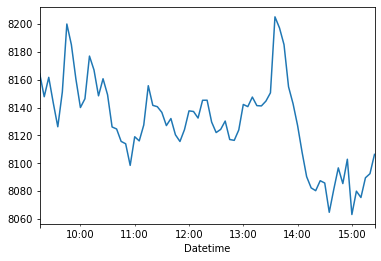

In [117]:
df1.loc['2020-4-3', 'Adj Close'].plot()

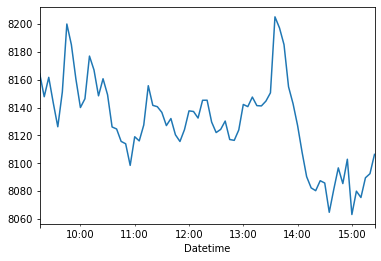

In [118]:
df1.loc['03 Apr 2020', 'Adj Close'].plot()

In [ ]:
################################################################
################### Class Exercise 2 ###########################
##### Step III (Calculate indicators, create rules, etc) #######
##### Step IV (Program it stepwise and check periodically) #####
################################################################


# Plot the 'Open', 'High', 'Low', Close' prices for 12 May 2020
# Delete the columns 'High', 'Low' and Volume' from df1a
# Create a column called 'cc_returns' which shows returns between successive 'Close' prices
# Create a variable called sma and assign it a value 12
# Create a column called 'sma' which is the 12-period moving average of the 'Close' price
# Create a column called 'position' which takes the value 1 when you go long (based on the given condition) and 0 otherwise
# Make any required changes in 'position' accordingly
# Check the number of 1s and 0s in 'position'. What does it tell you?

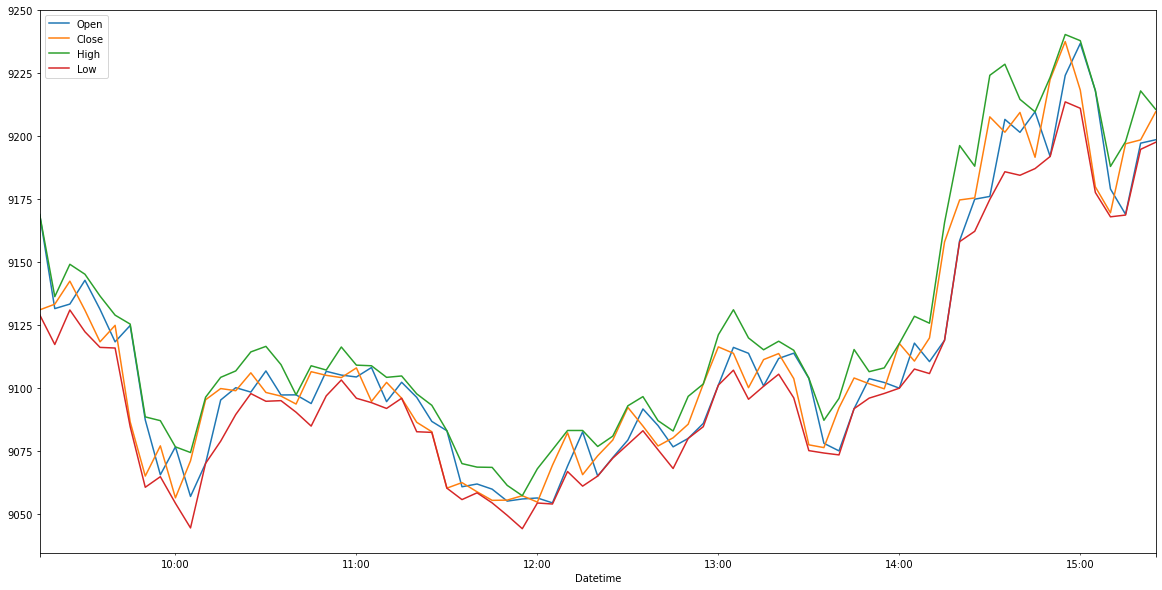

In [126]:
df1a.loc['2020-5-12'][['Open','Close','High', 'Low']].plot(figsize=(20,10));

In [128]:
df1a.drop(['High','Low'], axis =1, inplace=True)

In [129]:
df1a

,Open,Close,Adj Close,Volume
Datetime,,,,
2020-03-26 09:15:00+05:30,8451.000000,8339.349609,8339.349609,0
2020-03-26 09:20:00+05:30,8336.400391,8396.650391,8396.650391,0
2020-03-26 09:25:00+05:30,8396.849609,8476.599609,8476.599609,0
2020-03-26 09:30:00+05:30,8476.900391,8488.400391,8488.400391,0
2020-03-26 09:35:00+05:30,8490.099609,8487.500000,8487.500000,0
...,...,...,...,...
2020-05-14 15:05:00+05:30,9152.250000,9149.400391,9149.400391,0
2020-05-14 15:10:00+05:30,9149.049805,9137.299805,9137.299805,0
2020-05-14 15:15:00+05:30,9136.799805,9139.950195,9139.950195,0


In [130]:
df1a['cc_returns'] = df1['Close'].pct_change()
df1a

,Open,Close,Adj Close,Volume,cc_returns
Datetime,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8339.349609,8339.349609,0,NaN
2020-03-26 09:20:00+05:30,8336.400391,8396.650391,8396.650391,0,0.006871
2020-03-26 09:25:00+05:30,8396.849609,8476.599609,8476.599609,0,0.009522
2020-03-26 09:30:00+05:30,8476.900391,8488.400391,8488.400391,0,0.001392
2020-03-26 09:35:00+05:30,8490.099609,8487.500000,8487.500000,0,-0.000106
...,...,...,...,...,...
2020-05-14 15:05:00+05:30,9152.250000,9149.400391,9149.400391,0,-0.000049
2020-05-14 15:10:00+05:30,9149.049805,9137.299805,9137.299805,0,-0.001323
2020-05-14 15:15:00+05:30,9136.799805,9139.950195,9139.950195,0,0.000290


In [131]:
sma = 12

In [132]:
df1a['sma'] = df1a['Close'].rolling(window=sma).mean()
print(df1a.head())

                                  Open        Close    Adj Close  Volume  \
Datetime                                                                   
2020-03-26 09:15:00+05:30  8451.000000  8339.349609  8339.349609       0   
2020-03-26 09:20:00+05:30  8336.400391  8396.650391  8396.650391       0   
2020-03-26 09:25:00+05:30  8396.849609  8476.599609  8476.599609       0   
2020-03-26 09:30:00+05:30  8476.900391  8488.400391  8488.400391       0   
2020-03-26 09:35:00+05:30  8490.099609  8487.500000  8487.500000       0   

                           cc_returns  sma  
Datetime                                    
2020-03-26 09:15:00+05:30         NaN  NaN  
2020-03-26 09:20:00+05:30    0.006871  NaN  
2020-03-26 09:25:00+05:30    0.009522  NaN  
2020-03-26 09:30:00+05:30    0.001392  NaN  
2020-03-26 09:35:00+05:30   -0.000106  NaN  


```python

df1a.loc['12 May 2020', ['Open', 'High', 'Low', 'Close']].plot(grid=True, linewidth=1, figsize=(14, 9))
df1a.drop(columns=['High', 'Low', 'Volume'], inplace=True)
df1a['cc_returns'] = df1a['Close'].pct_change()
sma = 12
df1a['sma'] = df1a['Close'].rolling(window=sma).mean()
print(df1a.head())
print(df1a.tail())
df1a['position'] = np.where((df1a['Close'] > df1a['sma']), 1, 0)
df1a['position'] = df1a['position'].shift(1)

df1a['position'].value_counts()
print(df1a.head())
print(df1a.tail())
```

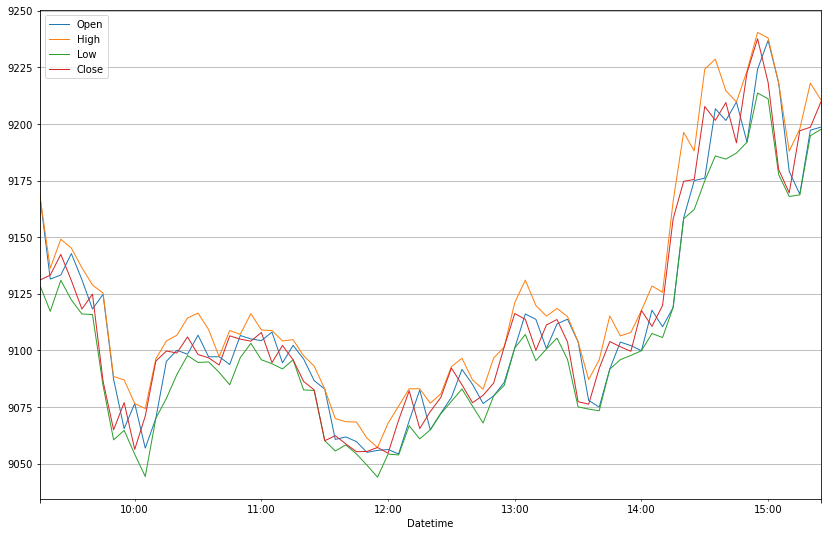

In [12]:
df1a.loc['12 May 2020', ['Open', 'High', 'Low', 'Close']].plot(grid=True, linewidth=1, figsize=(14, 9))

In [13]:
df1a.drop(columns=['High', 'Low', 'Volume'], inplace=True)

In [14]:
df1a.tail()

,Open,Close,Adj Close
Datetime,,,
2020-05-14 15:05:00+05:30,9152.250000,9149.400391,9149.400391
2020-05-14 15:10:00+05:30,9149.049805,9137.299805,9137.299805
2020-05-14 15:15:00+05:30,9136.799805,9139.950195,9139.950195
2020-05-14 15:20:00+05:30,9139.400391,9145.500000,9145.500000
2020-05-14 15:25:00+05:30,9145.650391,9150.200195,9150.200195


In [15]:
df1a['cc_returns'] = df1a['Close'].pct_change()

In [16]:
sma = 12
df1a['sma'] = df1a['Close'].rolling(window=sma).mean()
print(df1a.head())
print(df1a.tail())
df1a['position'] = np.where((df1a['Close'] > df1a['sma']), 1, 0)

                                  Open        Close    Adj Close  cc_returns  \
Datetime                                                                       
2020-03-26 09:15:00+05:30  8451.000000  8339.349609  8339.349609         NaN   
2020-03-26 09:20:00+05:30  8336.400391  8396.650391  8396.650391    0.006871   
2020-03-26 09:25:00+05:30  8396.849609  8476.599609  8476.599609    0.009522   
2020-03-26 09:30:00+05:30  8476.900391  8488.400391  8488.400391    0.001392   
2020-03-26 09:35:00+05:30  8490.099609  8487.500000  8487.500000   -0.000106   

                           sma  
Datetime                        
2020-03-26 09:15:00+05:30  NaN  
2020-03-26 09:20:00+05:30  NaN  
2020-03-26 09:25:00+05:30  NaN  
2020-03-26 09:30:00+05:30  NaN  
2020-03-26 09:35:00+05:30  NaN  
                                  Open        Close    Adj Close  cc_returns  \
Datetime                                                                       
2020-05-14 15:05:00+05:30  9152.250000  9149.400

In [133]:
df1a['position'] = np.where((df1a['Close'] > df1a['sma']), 1, 0)
df1a

,Open,Close,Adj Close,Volume,cc_returns,sma,position
Datetime,,,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8339.349609,8339.349609,0,NaN,NaN,0
2020-03-26 09:20:00+05:30,8336.400391,8396.650391,8396.650391,0,0.006871,NaN,0
2020-03-26 09:25:00+05:30,8396.849609,8476.599609,8476.599609,0,0.009522,NaN,0
2020-03-26 09:30:00+05:30,8476.900391,8488.400391,8488.400391,0,0.001392,NaN,0
2020-03-26 09:35:00+05:30,8490.099609,8487.500000,8487.500000,0,-0.000106,NaN,0
...,...,...,...,...,...,...,...
2020-05-14 15:05:00+05:30,9152.250000,9149.400391,9149.400391,0,-0.000049,9149.166585,1
2020-05-14 15:10:00+05:30,9149.049805,9137.299805,9137.299805,0,-0.001323,9148.541585,0
2020-05-14 15:15:00+05:30,9136.799805,9139.950195,9139.950195,0,0.000290,9147.887451,0


In [134]:
df1a['position'].value_counts()

1    1136
0    1106
Name: position, dtype: int64

In [135]:
################################################################
################### Class Exercise 3 ###########################
##### Step III (Calculate indicators, create rules, etc) #######
##### Step IV (Program it stepwise and check periodically) #####
################################################################

# Create a column called 'strategy_returns' which has the strategy returns over the backtesting period
# Check the first few and last few rows of the data frame
# Plot the returns for a buy-and-hold approach and the strategy we just created
# What are the cumulative returns in each case at the end of the period?
'''IMPORTANT ASSUMPTION: We are trading at Close on the day when either our buy or sell condition is met. Lookahead 
bias is baked into our model. To begin with, while we learn, we can live with this. As we gradually rev up our 
programming skills we will relax our simplifying assumptions.'''

'IMPORTANT ASSUMPTION: We are trading at Close on the day when either our buy or sell condition is met. Lookahead \nbias is baked into our model. To begin with, while we learn, we can live with this. As we gradually rev up our \nprogramming skills we will relax our simplifying assumptions.'

In [136]:
df1a

,Open,Close,Adj Close,Volume,cc_returns,sma,position
Datetime,,,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8339.349609,8339.349609,0,NaN,NaN,0
2020-03-26 09:20:00+05:30,8336.400391,8396.650391,8396.650391,0,0.006871,NaN,0
2020-03-26 09:25:00+05:30,8396.849609,8476.599609,8476.599609,0,0.009522,NaN,0
2020-03-26 09:30:00+05:30,8476.900391,8488.400391,8488.400391,0,0.001392,NaN,0
2020-03-26 09:35:00+05:30,8490.099609,8487.500000,8487.500000,0,-0.000106,NaN,0
...,...,...,...,...,...,...,...
2020-05-14 15:05:00+05:30,9152.250000,9149.400391,9149.400391,0,-0.000049,9149.166585,1
2020-05-14 15:10:00+05:30,9149.049805,9137.299805,9137.299805,0,-0.001323,9148.541585,0
2020-05-14 15:15:00+05:30,9136.799805,9139.950195,9139.950195,0,0.000290,9147.887451,0


In [137]:
df1a['strategy_returns'] = df1a['cc_returns'] * df1a['position']
df1a

,Open,Close,Adj Close,Volume,cc_returns,sma,position,strategy_returns
Datetime,,,,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8339.349609,8339.349609,0,NaN,NaN,0,NaN
2020-03-26 09:20:00+05:30,8336.400391,8396.650391,8396.650391,0,0.006871,NaN,0,0.000000
2020-03-26 09:25:00+05:30,8396.849609,8476.599609,8476.599609,0,0.009522,NaN,0,0.000000
2020-03-26 09:30:00+05:30,8476.900391,8488.400391,8488.400391,0,0.001392,NaN,0,0.000000
2020-03-26 09:35:00+05:30,8490.099609,8487.500000,8487.500000,0,-0.000106,NaN,0,-0.000000
...,...,...,...,...,...,...,...,...
2020-05-14 15:05:00+05:30,9152.250000,9149.400391,9149.400391,0,-0.000049,9149.166585,1,-0.000049
2020-05-14 15:10:00+05:30,9149.049805,9137.299805,9137.299805,0,-0.001323,9148.541585,0,-0.000000
2020-05-14 15:15:00+05:30,9136.799805,9139.950195,9139.950195,0,0.000290,9147.887451,0,0.000000


In [138]:
# If price is 100 at the end of period 1
# If price is 102 at the end of period 2
# And we were long, what is our return in percentage terms?

(102-100)/100



0.02

In [140]:
# If price is 100 at the end of period 1
# it increases by 2% in period 2
100 *(1+0.02)

102.0

In [142]:
# If price increases by 5% in period 3
100*(1+0.02)*(1+0.05)

107.10000000000001

```python

df1a['strategy_returns'] = df1a['cc_returns'] * df1a['position']


df1a['strategy_returns'] = 1 + df1a['strategy_returns']
df1a['cc_returns'] = 1 + df1a['cc_returns']

print(df1a.head())
print(df1a.tail())

df1a[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

print('Buy and hold returns: ', np.round(df1a['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1a['strategy_returns'].cumprod()[-1], 2))
```


                                  Open        Close    Adj Close  Volume  \
Datetime                                                                   
2020-03-26 09:15:00+05:30  8451.000000  8339.349609  8339.349609       0   
2020-03-26 09:20:00+05:30  8336.400391  8396.650391  8396.650391       0   
2020-03-26 09:25:00+05:30  8396.849609  8476.599609  8476.599609       0   
2020-03-26 09:30:00+05:30  8476.900391  8488.400391  8488.400391       0   
2020-03-26 09:35:00+05:30  8490.099609  8487.500000  8487.500000       0   

                           cc_returns  sma  position  strategy_returns  
Datetime                                                                
2020-03-26 09:15:00+05:30         NaN  NaN         0               NaN  
2020-03-26 09:20:00+05:30    1.006871  NaN         0               1.0  
2020-03-26 09:25:00+05:30    1.009522  NaN         0               1.0  
2020-03-26 09:30:00+05:30    1.001392  NaN         0               1.0  
2020-03-26 09:35:00+05:30    

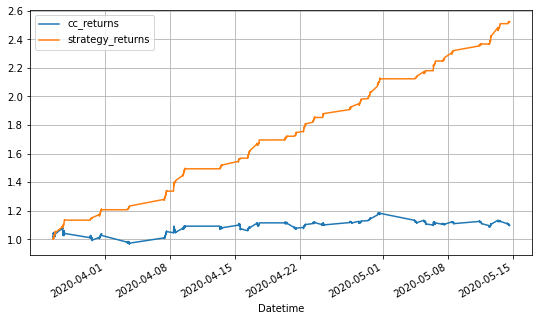

In [143]:
# PUTTING ALL PARTS TOGETHER

# 1) Fetching the data
df1a = df1.copy()

# 2) Computed the indicators
sma = 12
df1a['sma'] = df1a['Close'].rolling(window=sma).mean()

# 3) Computed the position 
df1a['position'] = np.where((df1a['Close'] > df1a['sma']), 1, 0)
df1a['position']= df1a['position'].shift(1)

# 4) Compute the returns
df1a['cc_returns'] = df1a['Close'].pct_change()
df1a['strategy_returns'] = df1a['cc_returns'] * df1a['position']

# 5) ANALYTICS: Computed and plotted the CUMULATIVE PERFORMANCE
df1a['strategy_returns'] = 1 + df1a['strategy_returns']
df1a['cc_returns'] = 1 + df1a['cc_returns']

df1a[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

print('Buy and hold returns: ', np.round(df1a['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1a['strategy_returns'].cumprod()[-1], 2))

In [150]:
df1a

,Open,Close,Adj Close,Volume,cc_returns,sma,position,strategy_returns
Datetime,,,,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8339.349609,8339.349609,0,NaN,NaN,0,NaN
2020-03-26 09:20:00+05:30,8336.400391,8396.650391,8396.650391,0,1.006871,NaN,0,1.000000
2020-03-26 09:25:00+05:30,8396.849609,8476.599609,8476.599609,0,1.009522,NaN,0,1.000000
2020-03-26 09:30:00+05:30,8476.900391,8488.400391,8488.400391,0,1.001392,NaN,0,1.000000
2020-03-26 09:35:00+05:30,8490.099609,8487.500000,8487.500000,0,0.999894,NaN,0,1.000000
...,...,...,...,...,...,...,...,...
2020-05-14 15:05:00+05:30,9152.250000,9149.400391,9149.400391,0,0.999951,9149.166585,1,0.999951
2020-05-14 15:10:00+05:30,9149.049805,9137.299805,9137.299805,0,0.998677,9148.541585,0,1.000000
2020-05-14 15:15:00+05:30,9136.799805,9139.950195,9139.950195,0,1.000290,9147.887451,0,1.000000


In [146]:
df1a['cc_returns'].cumprod()

Datetime
2020-03-26 09:15:00+05:30         NaN
2020-03-26 09:20:00+05:30    1.006871
2020-03-26 09:25:00+05:30    1.016458
2020-03-26 09:30:00+05:30    1.017873
2020-03-26 09:35:00+05:30    1.017765
                               ...   
2020-05-14 15:05:00+05:30    1.097136
2020-05-14 15:10:00+05:30    1.095685
2020-05-14 15:15:00+05:30    1.096003
2020-05-14 15:20:00+05:30    1.096668
2020-05-14 15:25:00+05:30    1.097232
Name: cc_returns, Length: 2242, dtype: float64

In [147]:
df1a['cc_returns'].cumprod()[-1]

1.097231873457604

In [148]:
np.round(df1a['cc_returns'].cumprod()[-1],2)

1.1

In [149]:
np.round(df1a['strategy_returns'].cumprod()[-1],2)

2.52

In [144]:
df1a

,Open,Close,Adj Close,Volume,cc_returns,sma,position,strategy_returns
Datetime,,,,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8339.349609,8339.349609,0,NaN,NaN,0,NaN
2020-03-26 09:20:00+05:30,8336.400391,8396.650391,8396.650391,0,1.006871,NaN,0,1.000000
2020-03-26 09:25:00+05:30,8396.849609,8476.599609,8476.599609,0,1.009522,NaN,0,1.000000
2020-03-26 09:30:00+05:30,8476.900391,8488.400391,8488.400391,0,1.001392,NaN,0,1.000000
2020-03-26 09:35:00+05:30,8490.099609,8487.500000,8487.500000,0,0.999894,NaN,0,1.000000
...,...,...,...,...,...,...,...,...
2020-05-14 15:05:00+05:30,9152.250000,9149.400391,9149.400391,0,0.999951,9149.166585,1,0.999951
2020-05-14 15:10:00+05:30,9149.049805,9137.299805,9137.299805,0,0.998677,9148.541585,0,1.000000
2020-05-14 15:15:00+05:30,9136.799805,9139.950195,9139.950195,0,1.000290,9147.887451,0,1.000000


In [20]:
df1a['strategy_returns'] = df1a['cc_returns'] * df1a['position']

In [21]:
df1a['strategy_returns'] = 1 + df1a['strategy_returns']

In [22]:
df1a['cc_returns'] = 1 + df1a['cc_returns']

In [23]:
print(df1a.head())
print(df1a.tail())

                                  Open        Close    Adj Close  cc_returns  \
Datetime                                                                       
2020-03-26 09:15:00+05:30  8451.000000  8339.349609  8339.349609         NaN   
2020-03-26 09:20:00+05:30  8336.400391  8396.650391  8396.650391    1.006871   
2020-03-26 09:25:00+05:30  8396.849609  8476.599609  8476.599609    1.009522   
2020-03-26 09:30:00+05:30  8476.900391  8488.400391  8488.400391    1.001392   
2020-03-26 09:35:00+05:30  8490.099609  8487.500000  8487.500000    0.999894   

                           sma  position  strategy_returns  
Datetime                                                    
2020-03-26 09:15:00+05:30  NaN         0               NaN  
2020-03-26 09:20:00+05:30  NaN         0               1.0  
2020-03-26 09:25:00+05:30  NaN         0               1.0  
2020-03-26 09:30:00+05:30  NaN         0               1.0  
2020-03-26 09:35:00+05:30  NaN         0               1.0  
            

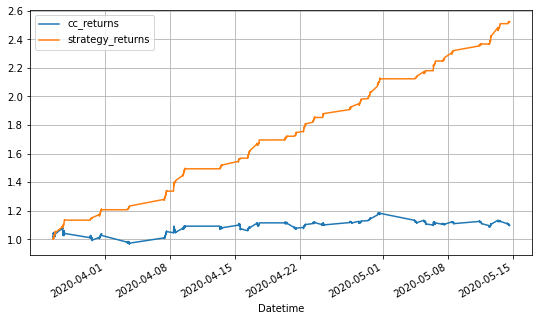

In [24]:
df1a[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

In [25]:
print('Buy and hold returns: ', np.round(df1a['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1a['strategy_returns'].cumprod()[-1], 2))

Buy and hold returns:  1.1
Strategy returns:  2.52


#### Strategy # 1B: Exponential Moving Average *(Long only)*

We compute the 12 period exponential moving average ('EMA12') and compare it with the price at that time. This is similar to the previous one, instead we use the EMA.

When we calculate the SMA for `n` periods, the same weight is applied to each of the past `n` prices. In EMA, on the other hand, we apply different weights to each past price. Higher weights are assigned to the more recent ones. All modern finance libraries directly calculate it for us. EMA reacts faster to price action than SMA.

Buy and hold returns:  1.1
Strategy returns:  1.22


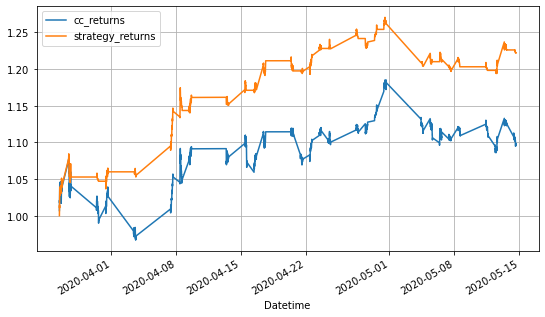

In [153]:
# PUTTING ALL PARTS TOGETHER

# 1) Fetching the data
df1b = df1.copy()

# 2) Computed the indicators
ema = 12
#df1b['sma'] = df1b['Close'].rolling(window=sma).mean()
df1b['ema'] = df1b['Close'].ewm(span=ema).mean()

# 3) Computed the position 
df1b['position'] = np.where((df1b['Close'] > df1b['ema']), 1, 0)
df1b['position']= df1b['position'].shift(2) # We assume that we trade at the Close of the next candle

# 4) Compute the returns
df1b['cc_returns'] = df1b['Close'].pct_change()
df1b['strategy_returns'] = df1b['cc_returns'] * df1b['position']

# 5) ANALYTICS: Computed and plotted the CUMULATIVE PERFORMANCE
df1b['strategy_returns'] = 1 + df1b['strategy_returns']
df1b['cc_returns'] = 1 + df1b['cc_returns']

df1b[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

print('Buy and hold returns: ', np.round(df1b['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1b['strategy_returns'].cumprod()[-1], 2))

In [ ]:
#############################################################
################## Class Exercise 4 #########################
#############################################################

# Create a copy of df called df1b. (We will manipulate and work with the df1a DataFrame.)
# Create a variable called ema and assign it a value 12
# Create a column called 'ema' which is the 12-period moving average of the 'Close' price
# Create a column called 'cc_returns' which shows returns between successive 'Close' prices
# Create a column called 'position' which takes the value 1 when you go long (based on the given condition) and 0 otherwise
##### IMPORTANT ASSUMPTION: Assume that when you get the indication to go long, you buy at the close price 5 minutes later
# Make any required changes in 'position' accordingly
# Check the number of 1s and 0s in 'position'. What does it tell you?
# Create a column called 'strategy_returns' which has the strategy returns over the backtesting period
# Check the first few and last few rows of the data frame
# Plot the returns for a buy-and-hold approach and the strategy we just created
# What are the cumulative returns in each case at the end of the period?


```python

df1b = df.copy()

df1b['cc_returns'] = df1b['Close'].pct_change()
ema = 12
df1b['ema'] = df1b['Close'].ewm(span=ema, adjust=False).mean()
print(df1b.head())
print(df1b.tail())
df1b['position'] = np.where((df1b['Close'] > df1b['ema']), 1, 0)
df1b['position'] = df1b['position'].shift(2)

df1b['position'].value_counts()
print(df1b.head())
print(df1b.tail())

df1b['strategy_returns'] = df1b['cc_returns'] * df1b['position']


df1b['strategy_returns'] = 1 + df1b['strategy_returns']
df1b['cc_returns'] = 1 + df1b['cc_returns']

print(df1b.head())
print(df1b.tail())

df1b[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

print('Buy and hold returns: ', np.round(df1b['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1b['strategy_returns'].cumprod()[-1], 2))

```

<div class="alert alert-danger" style="margin: 10px"><strong>Note:</strong> All home exercises in the Notebook are for self-study.</div>

In [ ]:
#############################################################
################## Home Exercise 1 ##########################
#############################################################

# Read about simple and exponential moving averages. Pay special attention to 
# cases where SMA is preferred over EMA or vice-versa.

In [154]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

#### Strategy # 2: Big moves on Mondays *(Long only)*

The [strategy](http://www.quantifiedstrategies.com/big-moves-on-mondays-update/) suggests that we go long on the S&P 500 on a Monday and close out our position on the Friday that week based on certain conditions. 

We assume that positions can be taken only in periods when markets are open on Monday and Friday in a week and the Friday in the previous week.

We calculate the following indicators and backtest the conditions shown below:

1. Calculate the 25-day average of `relative_range = (High - Low) / Close` and call it `rel_range_ma`.
2. The Monday `Close` must be lower than the previous Friday `Close` by at least 0.25 times of `rel_range_ma`. 
3. Create a variable `ibs = (Close - Low) / (High - Low)`. It must be lower than 0.3.
4. If conditions in 2, and 3 are met, go long on Monday `Close`.
5. Square off your position on Friday `Close`.

The Internal Bar Strength (IBS) indicator is used in mean-reverting strategies, which involves buying when prices are weak and selling when they are strong. It fluctuates between zero and one and assesses the position of the closing price in relation to the High and Low values. A low IBS value indicates a bullish sentiment, while a high value suggests bearishness in the short term. The underlying assumption is that the market tends to revert to its mean.

Weekend news impact on markets?

In [ ]:
#############################################################
################## Class Exercise 5 #########################
########## Step V (Writing comments in the code) ############
########## Step VI (Fragmenting code into parts) ############
#############################################################


# Create a function called 'download_daily_data' where you use yfinance to automatically download
# daily data based on three input arguments - ticker, the start date and the end date. 

# Create a function called 'compute_daily_returns' where you calculate the log daily returns based on 'Close' prices.
# You pass the pandas DataFrame as an argument to the function.

# Create three variables 'ticker2', 'end2', and 'start2'. Initialize 'ticker' to be "SPY", 'end2' to be 2 July 2020, and
# 'start2' to be the day 15 years in the past (from today).

# Use 'download_daily_data' to download SPY prices for the last 15 years into df.
# Create a copy of df called df2. We will work with df2 for the rest of the strategy.
# Use 'compute_daily_returns' to calculate daily returns of SPY into df2



```python

def download_daily_data(ticker, start, end):
    """ 
    The function downloads daily market data to a pandas DataFrame 
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)
    
    return data

def compute_daily_returns(data):
    """ 
    The function computes daily log returns based on the Close prices in the pandas DataFrame
    and stores it in a column  called 'cc_returns'.
    """
    data['cc_returns'] = np.log(data['Close'] / data['Close'].shift(1))
    
    return data

ticker2 = "SPY"
end2 = datetime.date(2020, 7, 2)
start2 = end2 - pd.Timedelta(days=365*15)

df = download_daily_data(ticker=ticker2, start=start2, end=end2)
df.head()
df.tail()

df2 = df.copy()
df2 = compute_daily_returns(data=df2)

df2.head()
df2.tail()
```

In [156]:
def download_daily_data(ticker, start, end):
    """ 
    The function downloads daily market data to a pandas DataFrame 
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)
    
    return data

[*********************100%***********************]  1 of 1 completed


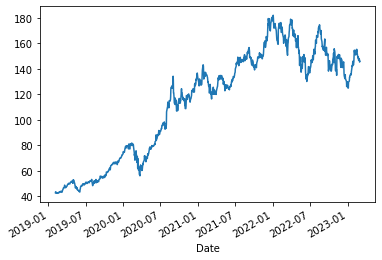

In [160]:
aapl = download_daily_data('AAPL', '2019-2-2', '2023-3-3')
aapl['Close'].plot()

In [161]:
def compute_daily_returns(data):
    """ 
    The function computes daily log returns based on the Close prices in the pandas DataFrame
    and stores it in a column  called 'cc_returns'.
    """
    data['cc_returns'] = np.log(data['Close'] / data['Close'].shift(1))
    
    return data

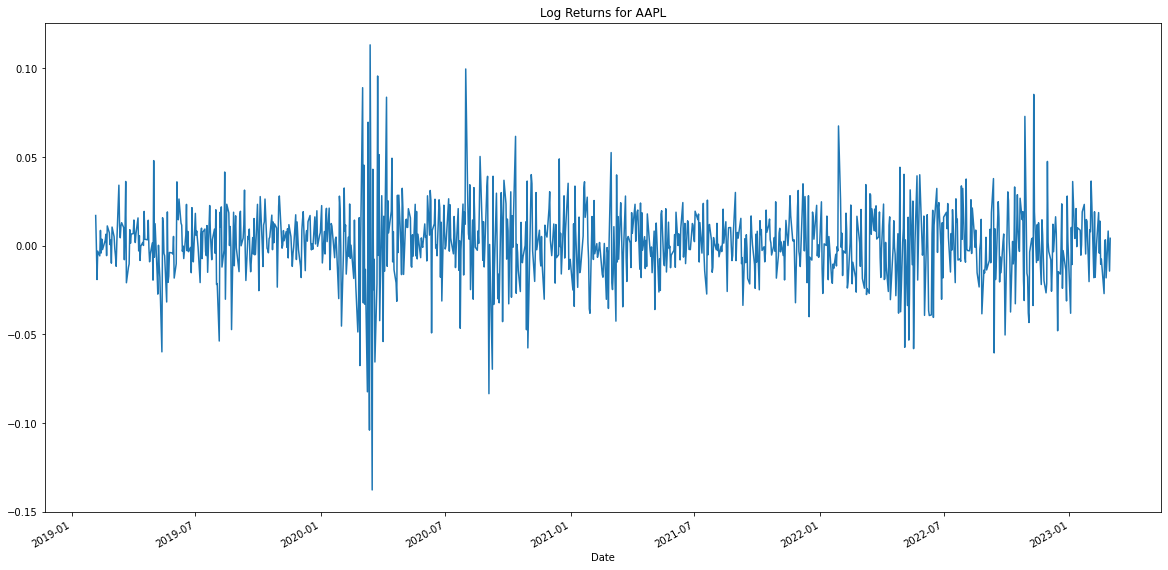

In [165]:
aapl = compute_daily_returns(aapl)
aapl['cc_returns'].plot(title='Log Returns for AAPL', figsize=(20,10))

In [169]:
def compute_indicators(data):
    """
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "Big Moves on Mondays" trading strategy.
    """
    # Columns created to check condition 1
    data['day'] = data.index.day_name()
    data['prev_day'] = data['day'].shift(1)
    data['four_days_after'] = data['day'].shift(-4)

    # Columns created to check condition 2
    data['relative_range'] = (data['High'] - data['Low']) / data['Close']
    data['rel_range_ma'] = data['relative_range'].rolling(window=25).mean()

    # Column created to check condition 3
    data['ibs'] = (data['Close'] - data['Low']) / (data['High'] - data['Low'])

    return data

In [176]:
aapl = compute_indicators(aapl)
aapl

,Open,High,Low,Close,Adj Close,Volume,cc_returns,day,prev_day,four_days_after,relative_range,rel_range_ma,ibs
Date,,,,,,,,,,,,,
2019-02-04,41.852501,42.915001,41.820000,42.812500,41.201603,125982000,NaN,Monday,NaN,Friday,0.025577,NaN,0.906392
2019-02-05,43.215000,43.770000,43.087502,43.544998,41.906548,144406400,0.016965,Tuesday,Monday,Monday,0.015673,NaN,0.670326
2019-02-06,43.662498,43.892502,43.212502,43.560001,41.920982,112958400,0.000344,Wednesday,Tuesday,Tuesday,0.015611,NaN,0.511029
2019-02-07,43.099998,43.485001,42.584999,42.735001,41.127026,126966800,-0.019121,Thursday,Wednesday,Wednesday,0.021060,NaN,0.166668
2019-02-08,42.247501,42.665001,42.105000,42.602501,41.175339,95280000,-0.003105,Friday,Thursday,Thursday,0.013145,NaN,0.888393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,147.110001,147.190002,145.720001,146.710007,146.507355,55469600,-0.018169,Friday,Thursday,Thursday,0.010020,0.023001,0.673473
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.715683,44998500,0.008214,Monday,Friday,NaN,0.011628,0.022363,0.273256
2023-02-28,147.050003,149.080002,146.830002,147.410004,147.206390,50547000,-0.003454,Tuesday,Monday,NaN,0.015264,0.021437,0.257779


In [177]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,cc_returns,day,prev_day,four_days_after,relative_range,rel_range_ma,ibs
Date,,,,,,,,,,,,,
2019-02-04,41.852501,42.915001,41.820000,42.812500,41.201603,125982000,NaN,Monday,NaN,Friday,0.025577,NaN,0.906392
2019-02-05,43.215000,43.770000,43.087502,43.544998,41.906548,144406400,0.016965,Tuesday,Monday,Monday,0.015673,NaN,0.670326
2019-02-06,43.662498,43.892502,43.212502,43.560001,41.920982,112958400,0.000344,Wednesday,Tuesday,Tuesday,0.015611,NaN,0.511029
2019-02-07,43.099998,43.485001,42.584999,42.735001,41.127026,126966800,-0.019121,Thursday,Wednesday,Wednesday,0.021060,NaN,0.166668
2019-02-08,42.247501,42.665001,42.105000,42.602501,41.175339,95280000,-0.003105,Friday,Thursday,Thursday,0.013145,NaN,0.888393


In [178]:
def backtest_strategy(data):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Big Moves on Mondays" trading strategy. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    data['condition1'] = np.where((data['day'] == 'Monday') 
                            & (data['prev_day'] == 'Friday') 
                            & (data['four_days_after'] == 'Friday'), 
                            1, 0)

    data['condition2'] = np.where((1 - data['Close'] / data['Close'].shift(1)) 
                                  >= 0.25 * data['rel_range_ma'], 1, 0)

    data['condition3'] = np.where(data['ibs'] < 0.3, 1, 0)

    data['signal'] = np.where((data['condition1']==1) 
                        & (data['condition2']==1) 
                        & (data['condition3']==1), 
                        1, 0)

    # The below two statements ensures that we can directly calculate strategy returns by multiplying the 
    # columns 'position' and 'cc_returns'
    data['signal'] = data['signal'].shift(1)

    data['position'] = data['signal'].replace(to_replace=0, method='ffill', limit=3)

    data['strategy_returns'] = data['cc_returns'] * data['position']

    return data

In [194]:
data

In [197]:
aapl[['position']]

,position
Date,
2019-02-04,NaN
2019-02-05,NaN
2019-02-06,NaN
2019-02-07,NaN
2019-02-08,0.0
...,...
2023-02-24,0.0
2023-02-27,0.0
2023-02-28,0.0


In [202]:
aapl.loc['2019-8-4':'2019-8-12'][['day','prev_day','four_days_after','position','cc_returns','strategy_returns']]

,day,prev_day,four_days_after,position,cc_returns,strategy_returns
Date,,,,,,
2019-08-05,Monday,Friday,Friday,0.0,-0.053768,-0.000000
2019-08-06,Tuesday,Monday,Monday,1.0,0.018753,0.018753
2019-08-07,Wednesday,Tuesday,Tuesday,1.0,0.010302,0.010302
2019-08-08,Thursday,Wednesday,Wednesday,1.0,0.021816,0.021816
2019-08-09,Friday,Thursday,Thursday,1.0,-0.012067,-0.012067
2019-08-12,Monday,Friday,Friday,0.0,-0.002541,-0.000000


In [198]:
aapl[aapl['position']==1]

,Open,High,Low,Close,Adj Close,Volume,cc_returns,day,prev_day,four_days_after,relative_range,rel_range_ma,ibs,condition1,condition2,condition3,signal,position,strategy_returns
Date,,,,,,,,,,,,,,,,,,,
2019-08-06,49.077499,49.517502,48.509998,49.250000,47.783466,143299200,0.018753,Tuesday,Monday,Monday,0.020457,0.016451,0.734490,0,0,0,1.0,1.0,0.018753
2019-08-07,48.852501,49.889999,48.455002,49.759998,48.278278,133457600,0.010302,Wednesday,Tuesday,Tuesday,0.028838,0.017255,0.909407,0,0,0,0.0,1.0,0.010302
2019-08-08,50.049999,50.882500,49.847500,50.857498,49.343098,108038000,0.021816,Thursday,Wednesday,Wednesday,0.020351,0.017727,0.975844,0,0,0,0.0,1.0,0.021816
2019-08-09,50.325001,50.689999,49.822498,50.247501,48.936489,98478800,-0.012067,Friday,Thursday,Thursday,0.017265,0.017990,0.489917,0,1,0,0.0,1.0,-0.012067
2019-12-03,64.577499,64.882500,64.072502,64.862503,63.359840,114430400,-0.017991,Tuesday,Monday,Monday,0.012488,0.014812,0.975313,0,1,0,1.0,1.0,-0.017991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900,-0.002802,Friday,Thursday,Friday,0.021083,0.027493,0.798562,0,0,0,0.0,1.0,-0.002802
2023-01-31,142.699997,144.339996,142.279999,144.289993,143.871017,65874500,0.008980,Tuesday,Monday,Monday,0.014277,0.025919,0.975727,0,0,0,1.0,1.0,0.008980
2023-02-01,143.970001,146.610001,141.320007,145.429993,145.007706,77663600,0.007870,Wednesday,Tuesday,Tuesday,0.036375,0.026531,0.776936,0,0,0,0.0,1.0,0.007870


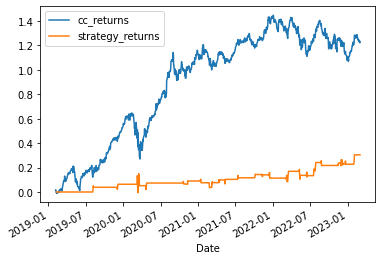

In [181]:
aapl[['cc_returns','strategy_returns']].cumsum().plot()

In [172]:
aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'cc_returns',
       'day', 'prev_day', 'four_days_after', 'relative_range', 'rel_range_ma',
       'ibs'],
      dtype='object')

In [175]:
aapl[['Close','day','prev_day','four_days_after']].head(20)

,Close,day,prev_day,four_days_after
Date,,,,
2019-02-04,42.812500,Monday,NaN,Friday
2019-02-05,43.544998,Tuesday,Monday,Monday
2019-02-06,43.560001,Wednesday,Tuesday,Tuesday
2019-02-07,42.735001,Thursday,Wednesday,Wednesday
2019-02-08,42.602501,Friday,Thursday,Thursday
2019-02-11,42.357498,Monday,Friday,Friday
2019-02-12,42.722500,Tuesday,Monday,Tuesday
2019-02-13,42.544998,Wednesday,Tuesday,Wednesday
2019-02-14,42.700001,Thursday,Wednesday,Thursday


In [168]:
aapl.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Thursday', 'Friday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype='object', name='Date', length=1027)

In [191]:
def show_backtesting_results(data):
    """
    The function displays the cumulative returns from the trading strategy and a buy-and-hold strategy. 
    It also plots a chart showing both returns and position over time.
    IMPORTANT: To be run ONLY after the function backtest_strategy.
    """
    print('Buy and hold returns: ', np.round(data['cc_returns'].cumsum()[-1], 2))
    print('Strategy returns: ', np.round(data['strategy_returns'].cumsum()[-1], 2))

    data[['cc_returns', 'strategy_returns']] = data[['cc_returns', 'strategy_returns']].cumsum()
    #data[['cc_returns', 'strategy_returns', 'position']].plot(
        #secondary_y='position', grid=True, figsize=(12, 8))
        
    data[['cc_returns', 'strategy_returns']].plot(figsize=(12, 8))

## Backtesting pipeline

In [ ]:
MA_LIST = [5,10,20,50,100]

for ma in MA_LIST:
    backtest_strategy and produce results
    

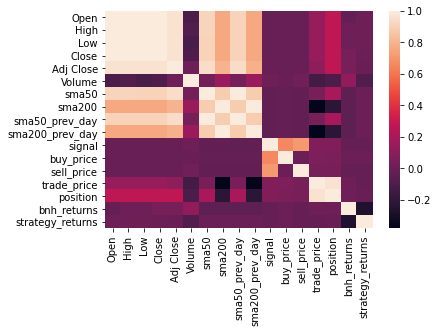

In [209]:
import seaborn as sns

sns.heatmap(df3.corr())

Input yfinance ticker:SPY
[*********************100%***********************]  1 of 1 completed
Buy and hold returns:  1.06
Strategy returns:  1.36


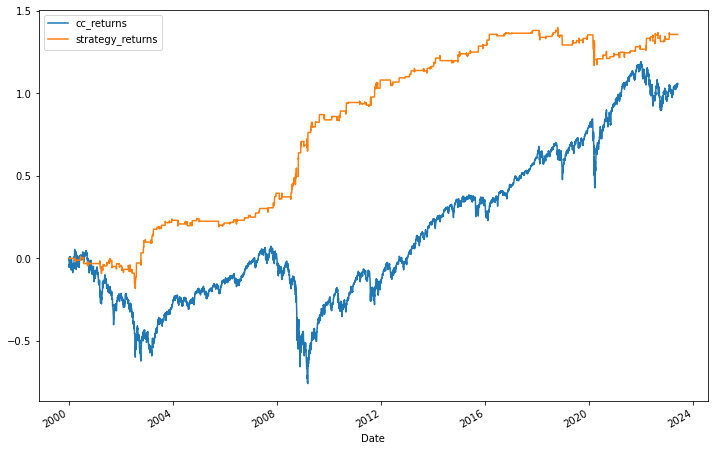

In [192]:
# TRYING 'BIG MOVES MONDAY' ON SPY
# PIPELINE

ticker = 'SPY'

#ticker = input('Input yfinance ticker:')
start = '2000-1-1'
end = '2023-6-1'

data = download_daily_data(ticker, start, end)
data = compute_daily_returns(data)
data = compute_indicators(data)
data = backtest_strategy(data)
data = show_backtesting_results(data)

In [28]:
ticker2 = "SPY"
end2 = datetime.date(2020, 7, 2)
start2 = end2 - pd.Timedelta(days=365*15)

In [29]:
df = download_daily_data(ticker=ticker2, start=start2, end=end2)
print(df.head())
df.tail()

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2005-07-06  120.389999  120.650002  119.410004  119.480003  84.665367   
2005-07-07  118.290001  119.949997  118.260002  119.949997  84.998398   
2005-07-08  119.970001  121.320000  119.720001  121.320000  85.969215   
2005-07-11  121.330002  122.099998  121.309998  121.940002  86.408554   
2005-07-12  121.989998  122.629997  121.639999  122.260002  86.635307   

               Volume  
Date                   
2005-07-06   52363600  
2005-07-07  103268800  
2005-07-08   64491200  
2005-07-11   49688300  
2005-07-12   51871100  


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-25,303.470001,307.640015,301.279999,307.350006,294.887665,89468000
2020-06-26,306.160004,306.390015,299.420013,300.049988,287.883698,127961000
2020-06-29,301.410004,304.609985,298.929993,304.459991,292.114807,79773300
2020-06-30,303.989990,310.200012,303.820007,308.359985,295.856689,113394800
2020-07-01,309.570007,311.890015,309.070007,310.519989,297.929108,72396500


In [30]:
df2 = df.copy()
df2 = compute_daily_returns(data=df2)

print(df2.head())
print(df2.tail())

                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2005-07-06  120.389999  120.650002  119.410004  119.480003  84.665367   
2005-07-07  118.290001  119.949997  118.260002  119.949997  84.998398   
2005-07-08  119.970001  121.320000  119.720001  121.320000  85.969215   
2005-07-11  121.330002  122.099998  121.309998  121.940002  86.408554   
2005-07-12  121.989998  122.629997  121.639999  122.260002  86.635307   

               Volume  cc_returns  
Date                               
2005-07-06   52363600         NaN  
2005-07-07  103268800    0.003926  
2005-07-08   64491200    0.011357  
2005-07-11   49688300    0.005097  
2005-07-12   51871100    0.002621  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-06-25  303.470001  307.640015  301.279999  307.350006  294.887665   
2020-06-26  30

In [ ]:
#############################################################
################## Class Exercise 6 #########################
########## Step V (Writing comments in the code) ############
########## Step VI (Fragmenting code into parts) ############
#############################################################

# Create a function called 'compute_indicators' where you add additional columns 'day', 'prev_day', 
# 'four_days_after', 'relative_range', 'rel_range_ma', and 'ibs' to df2 and compute them.

# Create a function called 'backtest_strategy' where you work with df2 from the previous step. You can add additional 
# columns 'condition1', 'condition2', 'condition3' and use them to calculate strategy returns.

# Create a function called 'show_backtesting_results' where you use df2 and 
# print the strategy returns and buy-and-hold returns.
# The functions also plots the strategy returns, buy-and-hold returns and the positions over time.

# Now run all of the functions one after the other.

```python

def compute_indicators(data):
    """
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "Big Moves on Mondays" trading strategy.
    """
    # Columns created to check condition 1
    data['day'] = data.index.day_name()
    data['prev_day'] = data['day'].shift(1)
    data['four_days_after'] = data['day'].shift(-4)
    
    # Columns created to check condition 2
    data['relative_range'] = (data['High'] - data['Low']) / data['Close']
    data['rel_range_ma'] = data['relative_range'].rolling(window=25).mean()
    
    # Column created to check condition 3
    data['ibs'] = (data['Close'] - data['Low']) / (data['High'] - data['Low'])
    
    return data

def backtest_strategy(data):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Big Moves on Mondays" trading strategy. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    data['condition1'] = np.where((data['day'] == 'Monday') 
                            & (data['prev_day'] == 'Friday') 
                            & (data['four_days_after'] == 'Friday'), 
                            1, 0)
    
    data['condition2'] = np.where((1 - data['Close'] / data['Close'].shift(1))
                                  >= 0.25 * data['rel_range_ma'], 1, 0)
    
    data['condition3'] = np.where(data['ibs'] < 0.3, 1, 0)
    
    data['signal'] = np.where((data['condition1']==1) 
                        & (data['condition2']==1) 
                        & (data['condition3']==1), 
                        1, 0)
    
    # The below two statements ensures that we can directly calculate strategy returns by multiplying the 
    # columns 'position' and 'cc_returns'
    data['signal'] = data['signal'].shift(1)
    
    data['position'] = data['signal'].replace(to_replace=0, method='ffill', limit=3)
    
    data['strategy_returns'] = data['cc_returns'] * data['position']
    
    return data


def show_backtesting_results(data):
    """
    The function displays the cumulative returns from the trading strategy and a buy-and-hold strategy. 
    It also plots a chart showing both returns and position over time.
    IMPORTANT: To be run ONLY after the function backtest_strategy.
    """
    print('Buy and hold returns: ', np.round(data['cc_returns'].cumsum()[-1], 2))
    print('Strategy returns: ', np.round(data['strategy_returns'].cumsum()[-1], 2))
    
    data[['cc_returns', 'strategy_returns']] = data[['cc_returns', 'strategy_returns']].cumsum()
    data[['cc_returns', 'strategy_returns', 'position']].plot(
        secondary_y='position', grid=True, figsize=(12, 8))

   
df = download_daily_data(ticker2, start2, end2)
df2 = df.copy()

df2 = compute_daily_returns(df2)
df2 = compute_indicators(df2)
df2 = backtest_strategy(df2)
show_backtesting_results(df2)
```

In [31]:
def compute_indicators(data):
    """
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "Big Moves on Mondays" trading strategy.
    """
    # Columns created to check condition 1
    data['day'] = data.index.day_name()
    data['prev_day'] = data['day'].shift(1)
    data['four_days_after'] = data['day'].shift(-4)
    
    # Columns created to check condition 2
    data['relative_range'] = (data['High'] - data['Low']) / data['Close']
    data['rel_range_ma'] = data['relative_range'].rolling(window=25).mean()
    
    # Column created to check condition 3
    data['ibs'] = (data['Close'] - data['Low']) / (data['High'] - data['Low'])
    
    return data

In [32]:
def backtest_strategy(data):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Big Moves on Mondays" trading strategy. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    data['condition1'] = np.where((data['day'] == 'Monday') 
                            & (data['prev_day'] == 'Friday') 
                            & (data['four_days_after'] == 'Friday'), 
                            1, 0)
    
    data['condition2'] = np.where((1 - data['Close'] / data['Close'].shift(1))
                                  >= 0.25 * data['rel_range_ma'], 1, 0)
    
    data['condition3'] = np.where(data['ibs'] < 0.3, 1, 0)
    
    data['signal'] = np.where((data['condition1']==1) 
                        & (data['condition2']==1) 
                        & (data['condition3']==1), 
                        1, 0)
    
    # The below two statements ensures that we can directly calculate strategy returns by multiplying the 
    # columns 'position' and 'cc_returns'
    data['signal'] = data['signal'].shift(1)
    
    data['position'] = data['signal'].replace(to_replace=0, method='ffill', limit=3)
    
    data['strategy_returns'] = data['cc_returns'] * data['position']
    
    return data

In [187]:
def show_backtesting_results(data):
    """
    The function displays the cumulative returns from the trading strategy and a buy-and-hold strategy. 
    It also plots a chart showing both returns and position over time.
    IMPORTANT: To be run ONLY after the function backtest_strategy.
    """
    print('Buy and hold returns: ', np.round(data['cc_returns'].cumsum()[-1], 2))
    print('Strategy returns: ', np.round(data['strategy_returns'].cumsum()[-1], 2))
    
    data[['cc_returns', 'strategy_returns']] = data[['cc_returns', 'strategy_returns']].cumsum()
    data[['cc_returns', 'strategy_returns', 'position']].plot(
        secondary_y='position', grid=True, figsize=(12, 8))
    plt.figure()
    data[['cc_returns', 'strategy_returns']].cumsum().plot()

In [34]:
df = download_daily_data(ticker2, start2, end2)

[*********************100%***********************]  1 of 1 completed


In [35]:
df2 = df.copy()

In [36]:
df2 = compute_daily_returns(df2)

In [37]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,cc_returns
Date,,,,,,,
2005-07-06,120.389999,120.650002,119.410004,119.480003,84.665367,52363600,NaN
2005-07-07,118.290001,119.949997,118.260002,119.949997,84.998413,103268800,0.003926
2005-07-08,119.970001,121.320000,119.720001,121.320000,85.969208,64491200,0.011357
2005-07-11,121.330002,122.099998,121.309998,121.940002,86.408554,49688300,0.005097
2005-07-12,121.989998,122.629997,121.639999,122.260002,86.635323,51871100,0.002621


In [38]:
df2 = compute_indicators(df2)

In [39]:
df2.tail()

,Open,High,Low,Close,Adj Close,Volume,cc_returns,day,prev_day,four_days_after,relative_range,rel_range_ma,ibs
Date,,,,,,,,,,,,,
2020-06-25,303.470001,307.640015,301.279999,307.350006,294.887604,89468000,0.010663,Thursday,Wednesday,Wednesday,0.020693,0.017904,0.954401
2020-06-26,306.160004,306.390015,299.420013,300.049988,287.883636,127961000,-0.024038,Friday,Thursday,NaN,0.023229,0.018293,0.090384
2020-06-29,301.410004,304.609985,298.929993,304.459991,292.114838,79773300,0.014591,Monday,Friday,NaN,0.018656,0.018713,0.973593
2020-06-30,303.989990,310.200012,303.820007,308.359985,295.856689,113394800,0.012728,Tuesday,Monday,NaN,0.020690,0.018641,0.711595
2020-07-01,309.570007,311.890015,309.070007,310.519989,297.929108,72396500,0.006980,Wednesday,Tuesday,NaN,0.009082,0.018121,0.514177


In [40]:
df2 = backtest_strategy(df2)

In [41]:
df2.head(10)

,Open,High,Low,Close,Adj Close,Volume,cc_returns,day,prev_day,four_days_after,relative_range,rel_range_ma,ibs,condition1,condition2,condition3,signal,position,strategy_returns
Date,,,,,,,,,,,,,,,,,,,
2005-07-06,120.389999,120.650002,119.410004,119.480003,84.665367,52363600,NaN,Wednesday,NaN,Tuesday,0.010378,NaN,0.056451,0,0,1,NaN,NaN,NaN
2005-07-07,118.290001,119.949997,118.260002,119.949997,84.998413,103268800,0.003926,Thursday,Wednesday,Wednesday,0.014089,NaN,1.000000,0,0,0,0.0,NaN,NaN
2005-07-08,119.970001,121.320000,119.720001,121.320000,85.969208,64491200,0.011357,Friday,Thursday,Thursday,0.013188,NaN,1.000000,0,0,0,0.0,NaN,NaN
2005-07-11,121.330002,122.099998,121.309998,121.940002,86.408554,49688300,0.005097,Monday,Friday,Friday,0.006479,NaN,0.797474,1,0,0,0.0,NaN,NaN
2005-07-12,121.989998,122.629997,121.639999,122.260002,86.635323,51871100,0.002621,Tuesday,Monday,Monday,0.008097,NaN,0.626267,0,0,0,0.0,0.0,0.0
2005-07-13,122.269997,122.519997,121.989998,122.430000,86.755798,41182300,0.001389,Wednesday,Tuesday,Tuesday,0.004329,NaN,0.830195,0,0,0,0.0,0.0,0.0
2005-07-14,122.980003,123.440002,122.489998,122.910004,87.095894,63638800,0.003913,Thursday,Wednesday,Wednesday,0.007729,NaN,0.442109,0,0,0,0.0,0.0,0.0
2005-07-15,122.790001,123.040001,122.360001,122.839996,87.046303,56075900,-0.000570,Friday,Thursday,Thursday,0.005536,NaN,0.705876,0,0,0,0.0,0.0,-0.0
2005-07-18,122.500000,122.629997,122.050003,122.349998,86.699104,56598400,-0.003997,Monday,Friday,Friday,0.004740,NaN,0.517239,1,0,0,0.0,0.0,-0.0


Buy and hold returns:  0.96
Strategy returns:  0.98


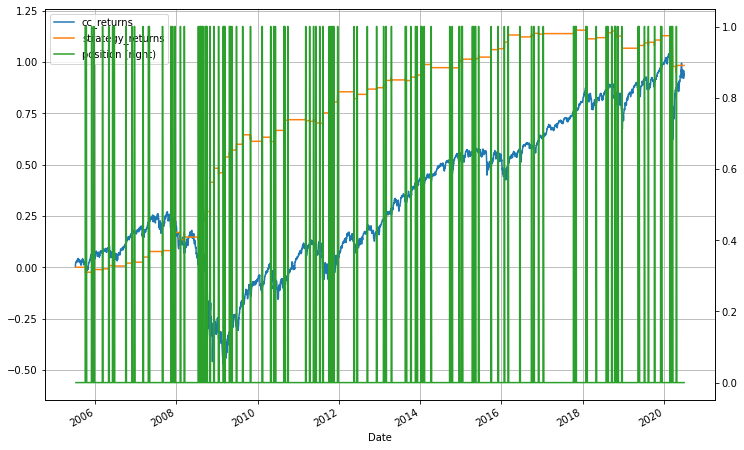

In [42]:
show_backtesting_results(df2)

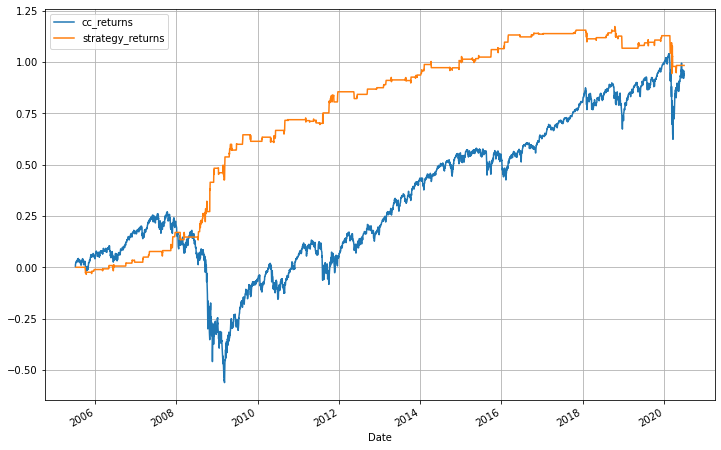

In [43]:
df2[['cc_returns', 'strategy_returns']].plot(grid=True, figsize=(12, 8))

<AxesSubplot:xlabel='Date'>

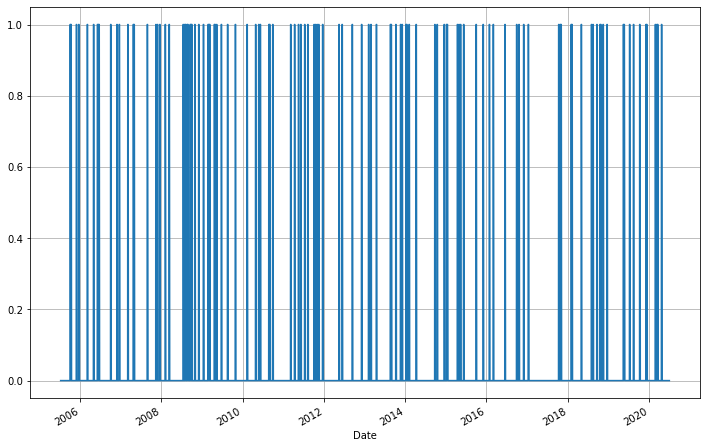

In [65]:
df2['position'].plot(grid=True, figsize=(12, 8))

In [ ]:
#############################################################################
###################### IGNORE THIS CELL #####################################
#############################################################################

# df2['signal'].value_counts()
# df2['position'].value_counts()

# df2[['cc_returns', 'strategy_returns', 'signal']].plot(
#         secondary_y='signal', grid=True, figsize=(12, 8))

### Noteworthy points

- We have followed the [**modular programming**](https://en.wikipedia.org/wiki/Modular_programming) approach here. To wit: We break a large task into smaller tasks (i.e. functions) to increase readability and make it easier to incorporate changes or detect errors. 
- Any model we build is only as good as its assumptions. So carefully observe what implicit AND explicit assumptions you're making.
- **Ignoring market friction:** We have not taken into account transaction costs, slippage, taxes, etc. Remember that whatever results we get are a highly optimistic presentation of what would actually result.
- **Look-ahead bias:** We decide on the trade based on Monday's close price. Then, we trade at that price itself. This is perfectly fine when we are hitting our straps with programming and backtesting. However, in real life, you would have to trade at a price AFTER the close. We have implicitly assumed that we can get a trade at the close price. As we sharpen our strategy before launching it in live markets, we should factor this in and make suitable modifications.
- The code and approach that we follow here is specifically for working with historical data. It CANNOT be directly deployed in the live markets. Changes would need to be made. That's a subject for a different day. But you should be cognizant of this.
- You can read more about backtesting [here](https://blog.quantinsti.com/backtesting/) or in Ernie Chan's book on Algorithmic Trading (Chapter 1) at your leisure.

#### Strategy # 3: The Moving Average Crossover Strategy *(Long-short)*

We have two SMA filters viz. the shorter lookback period SMA (henceforth referred to as  'SMA50') and the longer lookback period SMA (henceforth referred to as 'SMA200'). We go long on Tata Steel *at the first instance* when the SMA50 exceeds the SMA200. Similarly, we go short on it, *at the first instance* when the SMA200 exceeds the SMA50.

Our trading rules can be stated as

* Go long on day $n+2$ when SMA50 > SMA200 on day $n+1$ and SMA50 < SMA200 on day $n$
* Go short on day $n+2$ when SMA50 < SMA200 on day $n+1$ and SMA50 > SMA200 on day $n$

In [ ]:
#################################################################
################### Class Exercise 7 ############################
#################################################################

# Create a variable called end3 for today. Use the datetime library.
# Create a variable start3 which is 10 years before end3
# Use the yfinance library to download daily data into a variable df for "TATASTEEL.NS" 
# between start3 and end3.
# The download should be into a pandas DataFrame called df
# Check the data type, the dimensions, the first few and last few rows of the pandas DataFrame
# If above step looks fine, create a copy of df called df3. (We will manipulate and work with the df3 DataFrame.)


# **In case you do not have yfinance installed**, please use the attached csv file and import into pandas
# You can name the pandas DataFrame 'df'
# Check the data type, the dimensions, the first few and last few rows of 'df'
# Create a copy of df called df3. (We will manipulate and work with the df3 DataFrame.)


```python

ticker3 = "TATASTEEL.NS"
end3 = datetime.date(2020, 7, 2)
start3 = end3 - pd.Timedelta(days=365*10)

df = yf.download(ticker3, start3, end3)
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

df3 = df.copy()


# **ONLY** run the below lines if you have trouble with the library yfinance 


df = pd.read_csv("TATASTEEL.NS.csv", index_col=0, parse_dates=True)
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

df3 = df.copy()
```

In [44]:
ticker3 = "TATASTEEL.NS"
end3 = datetime.date(2020, 7, 2)
start3 = end3 - pd.Timedelta(days=365*10)

df = yf.download(ticker3, start3, end3)
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
(2461, 6)
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-07-05  45.350266  45.359791  44.778622  44.945351  15.157689  26618720
2010-07-06  45.064442  45.917141  44.597603  45.769466  15.435619  55621729
2010-07-07  46.112453  46.112453  45.112080  45.245464  15.258902  79492807
2010-07-08  46.112453  46.579292  45.550339  46.183907  15.575387  55717212
2010-07-09  46.565002  47.436756  46.350636  47.250973  15.935250  66962502
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-06-25  32.200001  32.740002  32.099998  32.310001  13.692986  113456530
2020-06-26  32.580002  32.994999  32.255001  32.384998  13.724768   97063330
2020-06-29  32.299999  32.599998  31.209999

In [83]:
df3 = df.copy()

In [ ]:
#############################################################################
###################### IGNORE THIS CELL #####################################
#############################################################################

# mydateparser = lambda x: pd.datetime.strptime(x, "%d-%m-%Y")
# df.to_csv("TATASTEEL.NS.csv")
# df = pd.read_csv("TATASTEEL.NS.csv", index_col=0, parse_dates=True)
# df = pd.read_csv("TATASTEEL.NS.csv", index_col=0, parse_dates=True, date_parser=mydateparser)

In [ ]:
############################################################################
######################### Class Exercise 8 #################################
############################################################################

# Create variables m=50 and n=200 for the shorter and longer lookback period respectively
# Create columns called 'sma50' and 'sma200' which are the moving averages based on the 'Adj Close' price
# Plot the 'sma50, 'sma200' and the 'Adj Close' for the data set
# Create columns 'sma50_prev_day' and 'sma200_prev_day' which are the moving averages shifted for the previous day
# Also periodically check df3 to see that each column is getting populated correctly.

```python

m = 50 # defining the shorter lookback period
n = 200 # defining the longer lookback period

df3['sma50'] = df3['Adj Close'].rolling(window=m).mean()
df3['sma200'] = df3['Adj Close'].rolling(window=n).mean()

df3['sma50'] = df3['sma50'].shift(1)
df3['sma200'] = df3['sma200'].shift(1)

df3[['Adj Close', 'sma50', 'sma200']].plot(grid=True, linewidth=0.5, figsize=(12, 8))

df3['sma50_prev_day'] = df3['sma50'].shift(1)
df3['sma200_prev_day'] = df3['sma200'].shift(1)

df3.head()
df3.tail()
df3.shape
```

In [84]:
m = 50 # defining the shorter lookback period
n = 200 # defining the longer lookback period

df3['sma50'] = df3['Adj Close'].rolling(window=m).mean()
df3['sma200'] = df3['Adj Close'].rolling(window=n).mean()

In [85]:
df3['sma50'] = df3['sma50'].shift(1)
df3['sma200'] = df3['sma200'].shift(1)

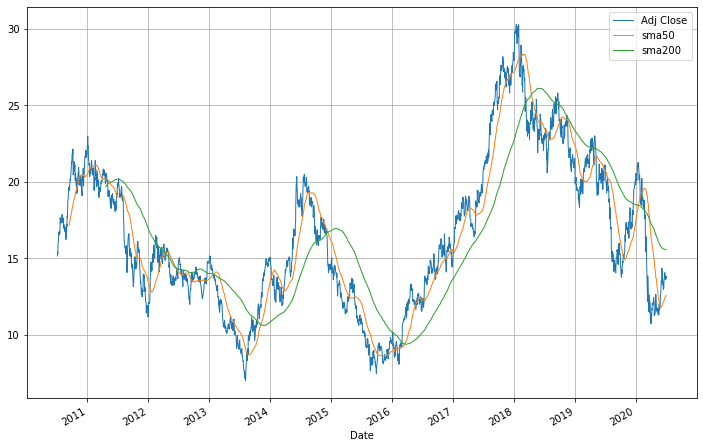

In [86]:
df3[['Adj Close', 'sma50', 'sma200']].plot(grid=True, linewidth=1, figsize=(12, 8))

In [87]:
df3['sma50_prev_day'] = df3['sma50'].shift(1)
df3['sma200_prev_day'] = df3['sma200'].shift(1)

In [73]:
df3.head()

,Open,High,Low,Close,Adj Close,Volume,sma50,sma200,sma50_prev_day,sma200_prev_day
Date,,,,,,,,,,
2010-07-05,45.350266,45.359791,44.778622,44.945351,15.157685,26618720,NaN,NaN,NaN,NaN
2010-07-06,45.064442,45.917141,44.597603,45.769466,15.435616,55621729,NaN,NaN,NaN,NaN
2010-07-07,46.112453,46.112453,45.112080,45.245464,15.258900,79492807,NaN,NaN,NaN,NaN
2010-07-08,46.112453,46.579292,45.550339,46.183907,15.575386,55717212,NaN,NaN,NaN,NaN
2010-07-09,46.565002,47.436756,46.350636,47.250973,15.935254,66962502,NaN,NaN,NaN,NaN


In [75]:
df3.tail()

,Open,High,Low,Close,Adj Close,Volume,sma50,sma200,sma50_prev_day,sma200_prev_day
Date,,,,,,,,,,
2020-06-25,32.200001,32.740002,32.099998,32.310001,13.692985,113456530,12.453242,15.587711,12.418321,15.590020
2020-06-26,32.580002,32.994999,32.255001,32.384998,13.724769,97063330,12.487612,15.585072,12.453242,15.587711
2020-06-29,32.299999,32.599998,31.209999,32.084999,13.597629,119611330,12.520414,15.580612,12.487612,15.585072
2020-06-30,32.310001,33.764999,32.310001,32.669998,13.845552,365236470,12.547495,15.578376,12.520414,15.580612
2020-07-01,32.900002,32.959999,32.029999,32.369999,13.718412,104894330,12.575763,15.575717,12.547495,15.578376


In [76]:
df3.shape

(2461, 10)

In [ ]:
##############value_counts#######################################################
######################### Class Exercise 9 #################################
############################################################################

# Create a column called 'signal' which takes values 0, +1, and -1 for no trade that day,
#  buy that day and sell that day respectively. You can use the np.where routine.
# Use the magic command %timeit to check how long it takes to execute it
# Check the first few and last few rows of the data frame
# Check the # of signals of each that you got
# Use the .apply() method to create two columns 'buy_price' and 'sell_price'. The columns 
# should give you the 'Adj Close' price when the respective buy or sell conditions are met. Record the price
# as positive when it's a buy and negative when it's a sell
# Use the magic command %timeit to check how long it takes to execute it
# Compare the time taken between the two.
# Create a column called 'trade_price' which combines the data from 'buy_price' and 'sell_price'. Forward fill,
# all the zeroes with the previous non-zero prices
# Create a column called 'position' which takes the value 1 when you are long, -1 when you are short
# and 0 otherwise

```python

%%timeit

df3['signal'] = np.where((df3['sma50'] > df3['sma200']) 
                        & (df3['sma50_prev_day'] < df3['sma200_prev_day']), 1, 0)
df3['signal'] = np.where((df3['sma50'] < df3['sma200']) 
                        & (df3['sma50_prev_day'] > df3['sma200_prev_day']), -1, df3['signal'])

df3['signal'].value_counts()


%%timeit

df3['buy_price'] = df3.apply(lambda x : x['Adj Close'] if x['sma50'] > x['sma200'] 
                        and x['sma50_prev_day'] < x['sma200_prev_day'] else 0, axis=1)

df3['sell_price'] = df3.apply(lambda y : -y['Adj Close'] if y['sma50'] < y['sma200'] 
                        and y['sma50_prev_day'] > y['sma200_prev_day'] else 0, axis=1)

df3['trade_price'] = df3['buy_price'] + df3['sell_price']
df3['trade_price']=df3['trade_price'].replace(to_replace=0, method='ffill')

df3['position'] = df3['signal'].replace(to_replace=0, method='ffill')
```

In [88]:
%%timeit

df3['signal'] = np.where((df3['sma50'] > df3['sma200']) 
                        & (df3['sma50_prev_day'] < df3['sma200_prev_day']), 1, 0)
df3['signal'] = np.where((df3['sma50'] < df3['sma200']) 
                        & (df3['sma50_prev_day'] > df3['sma200_prev_day']), -1, df3['signal'])

df3['signal'].value_counts()

962 µs ± 40.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
df3['signal'].value_counts()

 0    2450
-1       6
 1       5
Name: signal, dtype: int64

In [89]:
%%timeit

df3['buy_price'] = df3.apply(lambda x : x['Adj Close'] if x['sma50'] > x['sma200'] 
                        and x['sma50_prev_day'] < x['sma200_prev_day'] else 0, axis='columns')

df3['sell_price'] = df3.apply(lambda y : -y['Adj Close'] if y['sma50'] < y['sma200'] 
                        and y['sma50_prev_day'] > y['sma200_prev_day'] else 0, axis='columns')

60.1 ms ± 2.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [90]:
df3['trade_price'] = df3['buy_price'] + df3['sell_price']

In [58]:
df3.tail()

,Open,High,Low,Close,Adj Close,Volume,sma50,sma200,sma50_prev_day,sma200_prev_day,signal,buy_price,sell_price,trade_price,position
Date,,,,,,,,,,,,,,,
2020-06-25,32.200001,32.740002,32.099998,32.310001,13.692986,113456530,12.453242,15.587711,12.418321,15.590020,0,0.0,0.0,-12.15459,-1
2020-06-26,32.580002,32.994999,32.255001,32.384998,13.724768,97063330,12.487612,15.585072,12.453242,15.587711,0,0.0,0.0,-12.15459,-1
2020-06-29,32.299999,32.599998,31.209999,32.084999,13.597630,119611330,12.520414,15.580612,12.487612,15.585072,0,0.0,0.0,-12.15459,-1
2020-06-30,32.310001,33.764999,32.310001,32.669998,13.845552,365236470,12.547495,15.578376,12.520414,15.580612,0,0.0,0.0,-12.15459,-1
2020-07-01,32.900002,32.959999,32.029999,32.369999,13.718412,104894330,12.575763,15.575717,12.547495,15.578376,0,0.0,0.0,-12.15459,-1


In [63]:
df3.tail()

,Open,High,Low,Close,Adj Close,Volume,sma50,sma200,sma50_prev_day,sma200_prev_day,signal,buy_price,sell_price,trade_price,position,bnh_returns,strategy_returns
Date,,,,,,,,,,,,,,,,,
2020-06-25,32.200001,32.740002,32.099998,32.310001,13.692986,113456530,12.453242,15.587711,12.418321,15.590020,0,0.0,0.0,-12.15459,-1,-0.009089,0.009089
2020-06-26,32.580002,32.994999,32.255001,32.384998,13.724768,97063330,12.487612,15.585072,12.453242,15.587711,0,0.0,0.0,-12.15459,-1,0.002318,-0.002318
2020-06-29,32.299999,32.599998,31.209999,32.084999,13.597630,119611330,12.520414,15.580612,12.487612,15.585072,0,0.0,0.0,-12.15459,-1,-0.009307,0.009307
2020-06-30,32.310001,33.764999,32.310001,32.669998,13.845552,365236470,12.547495,15.578376,12.520414,15.580612,0,0.0,0.0,-12.15459,-1,0.018069,-0.018069
2020-07-01,32.900002,32.959999,32.029999,32.369999,13.718412,104894330,12.575763,15.575717,12.547495,15.578376,0,0.0,0.0,-12.15459,-1,-0.009225,0.009225


In [91]:
df3['trade_price']=df3['trade_price'].replace(to_replace=0, method='ffill')

In [92]:
df3['position'] = df3['signal'].replace(to_replace=0, method='ffill')

In [ ]:
############################################################################
######################### Class Exercise 10 ################################
############################################################################

# Plot the positions over time.
# Plot the strategy returns, and buy-and-hold returns.
# Display the strategy returns and buy-and-hold returns.

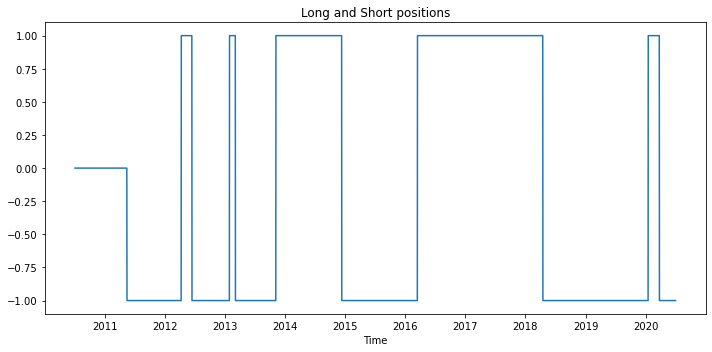

In [96]:
# Alternate way to plot graphs
plt.figure(figsize=(10, 5))
plt.plot(df3['position'])
plt.title("Long and Short positions")
plt.xlabel('Time')
plt.tight_layout()
plt.show();

In [93]:
df3['bnh_returns'] = np.log(df3['Adj Close'] / df3['Adj Close'].shift(1))

In [94]:
df3['strategy_returns'] = df3['bnh_returns'] * df3['position'].shift(1)

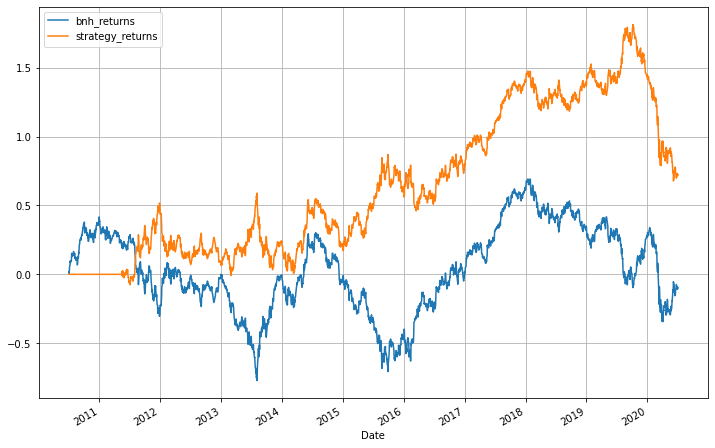

In [95]:
df3[['bnh_returns', 'strategy_returns']].cumsum().plot(grid=True, figsize=(12, 8))

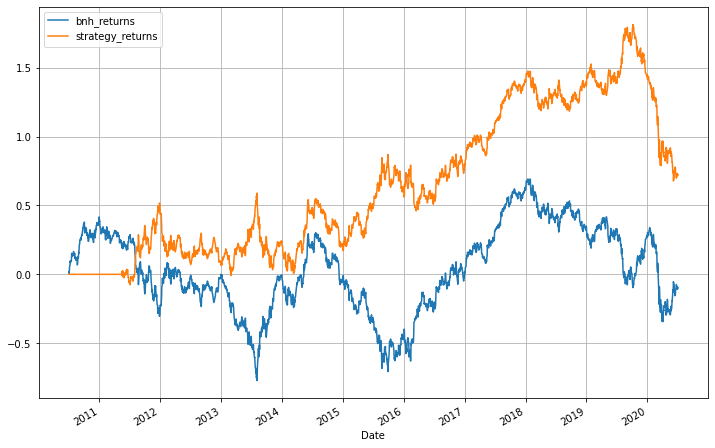

In [62]:
df3[['bnh_returns', 'strategy_returns']].cumsum().plot(grid=True, figsize=(12, 8))

In [88]:
print('Buy and hold returns: ', np.round(df3['bnh_returns'].cumsum()[-1], 2))
print('Strategy returns: ', np.round(df3['strategy_returns'].cumsum()[-1], 2))

Buy and hold returns:  -0.1
Strategy returns:  0.72


```python

# Alternate way to plot graphs
plt.figure(figsize=(10, 5))
plt.plot(df3['position'])
plt.title("Long and Short positions")
plt.xlabel('Time')
plt.tight_layout()
plt.show()

df3['bnh_returns'] = np.log(df3['Adj Close'] / df3['Adj Close'].shift(1))
df3['strategy_returns'] = df3['bnh_returns'] * df3['position'].shift(1)

df3[['bnh_returns', 'strategy_returns']].cumsum().plot(grid=True, figsize=(12, 8))

print('Buy and hold returns: ', np.round(df3['bnh_returns'].cumsum()[-1], 2))
print('Strategy returns: ', np.round(df3['strategy_returns'].cumsum()[-1], 2))
```

## HOMEWORK
#### [Strategy 4: MACD (Moving Average Convergence Divergence)](https://blog.quantinsti.com/python-trading/#Creating%20a%20sample%20trading%20strategy%20and%20backtesting%20in%20Python) *(Long-short)*

It is a simple and effective trend-following indicator.

The strategy uses:
- `MACD = 26 day EMA of 'Close' - 12 day EMA of 'Close'`, and
- `signal = 9 day EMA of MACD`

The trading signals are generated using `MACD` and `signal`.

- When `MACD` crosses above `signal`, we go long on the underlying security
- When `MACD` crosses below `signal`, then we go short on it

In [ ]:
#############################################################
################## Home Exercise 2 ##########################
#############################################################

# Read the article (shared above). 
# If possible, try writing the code to backtest the strategy yourself 
# You can check with the code below.
# Inspect it carefully so as to understand each line.

```python

ticker4 = "FB"
end4 = datetime.date(2020, 7, 2)
start4 = end4 - pd.Timedelta(days=365*5)

df = yf.download(ticker4, start4, end4)

df.shape
df.head()
df.tail()

df4 = df.copy()

df4['ema26'] = df4['Close'].ewm(span=26, adjust=False).mean()
df4['ema12'] = df4['Close'].ewm(span=12, adjust=False).mean()
df4['MACD'] = df4['ema12'] - df4['ema26']

df4['signal'] = df4['MACD'].ewm(span=9, adjust=False).mean()

df4[['signal', 'MACD', 'Close']].plot(figsize=(12, 8), grid=True, secondary_y='Close')

df4['position'] = np.where(df4['MACD'] > df4['signal'], 1, -1)
df4['position'] = df4['position'].shift(1)

df4['cc_returns'] = df4['Close'].pct_change()
df4['strategy_returns'] = df4['cc_returns'] * df4['position']

df4['cumulative_returns'] = (1 + df4['strategy_returns']).cumprod() - 1

df4['cumulative_returns'].plot(figsize=(12, 8), grid=True)

df4[['cumulative_returns', 'position']].plot(figsize=(12, 8), secondary_y='position', grid=True)

```

#### A glimpse at [`Pyfolio`](https://pypi.org/project/pyfolio/)

From the documentation:

> `Pyfolio` is a Python library for the performance and risk analysis of financial portfolios. At its core, is a so-called **tear sheet** that consists of various individual plots that provide a comprehensive performance overview of a portfolio.

> Pyfolio analyzes a backtest and provides a wealth of performance statistics commonly used by professional fund managers including annual/monthly returns, return quantiles, rolling beta/Sharpe ratios, portfolio turnover, and more.



```python

import pyfolio as pf
pf.create_simple_tear_sheet(df4['strategy_returns'], benchmark_rets=None)
pf.create_full_tear_sheet(df4['cc_returns'])
```

In [203]:
import pyfolio as pf

Start date,2010-07-05
End date,2020-07-01
Total months,117
,Backtest
Annual return,1.0%
Cumulative returns,10.3%
Annual volatility,35.8%
Sharpe ratio,0.21
Calmar ratio,0.01
Stability,0.65
Max drawdown,-70.9%


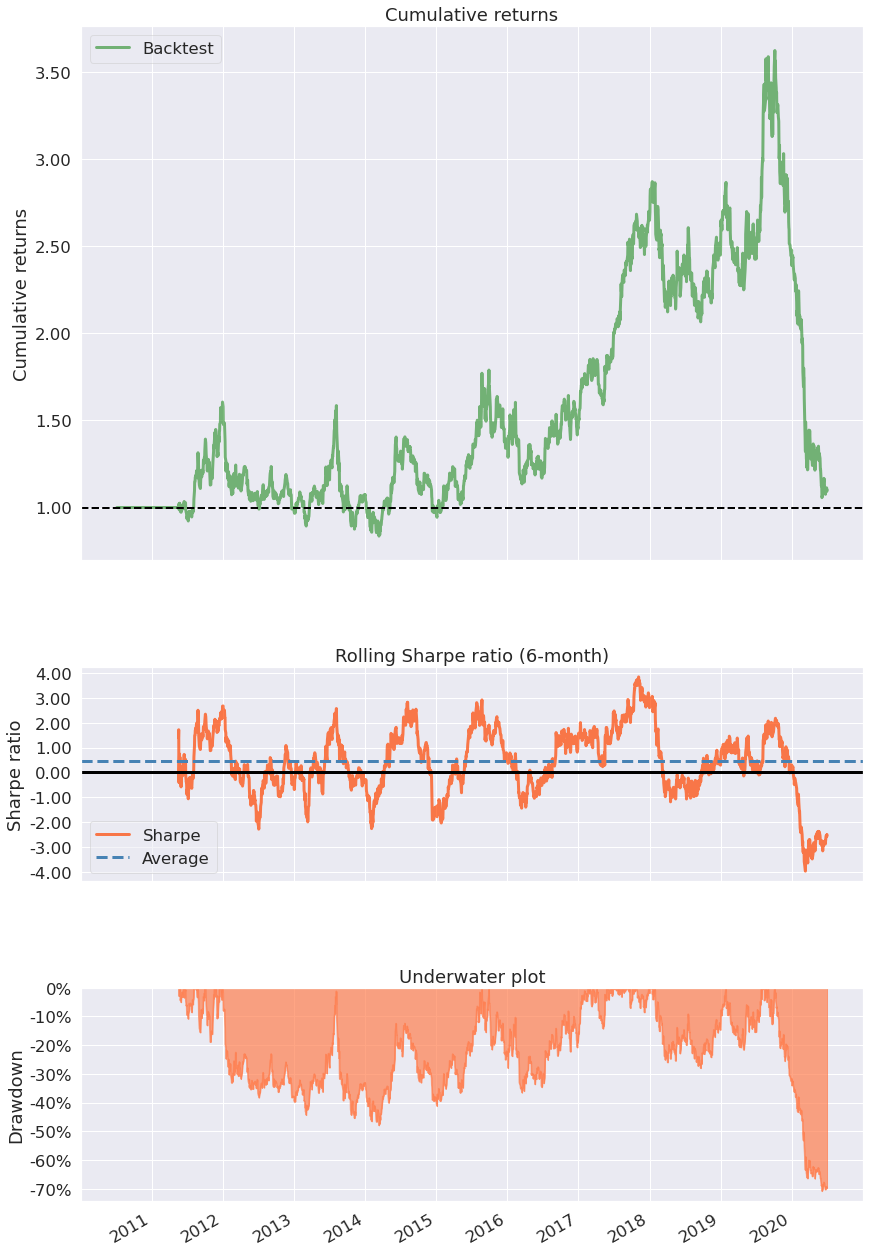

In [204]:
pf.create_simple_tear_sheet(df3['strategy_returns'])

Start date,2010-07-05
End date,2020-07-01
Total months,117
,Backtest
Annual return,1.0%
Cumulative returns,10.3%
Annual volatility,35.8%
Sharpe ratio,0.21
Calmar ratio,0.01
Stability,0.65
Max drawdown,-70.9%


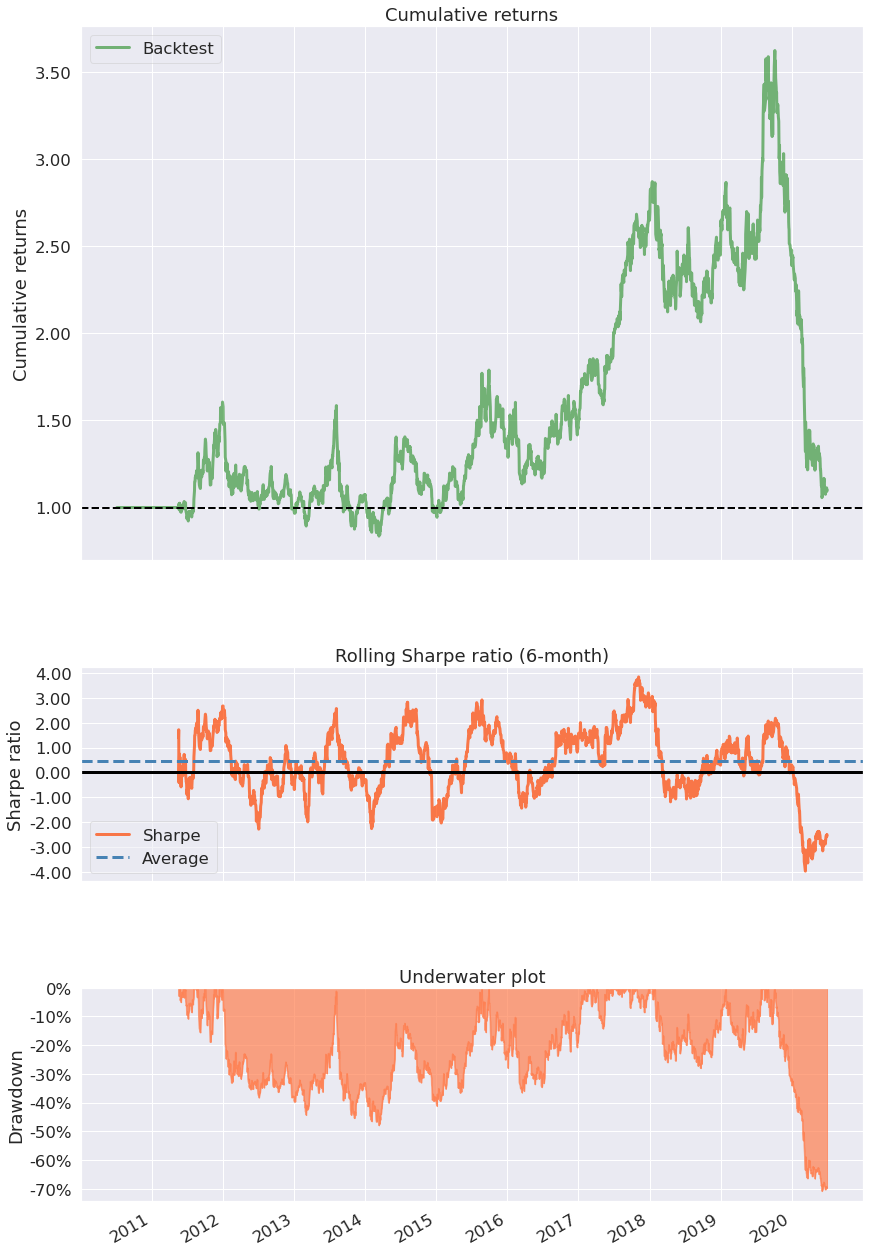

In [98]:
pf.create_simple_tear_sheet(df3['strategy_returns'], benchmark_rets=None)

<br>

<br>

## That's it for this session!

<br>

In [ ]:
### IGNORE ##
# Locate the index of the last row
last_index = df3.index[-1]

# Update the 'Position' column in the last row to 'Sell'
df3.loc[last_index, 'position'] = 0